<a href="https://colab.research.google.com/github/CAPost0110/Credit_Card_Fraud_Project-03_23-/blob/main/Portfolio_Project_Credit_Card_Fraud_bk3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Prediction

<img src='https://news.mit.edu/sites/default/files/images/201809/MIT-Fraud-Detection-PRESS.jpg'>

This is the final of three notebooks designing a credit card fraud prediction model. I have experimented with various ways of performing data cleaning, EDA, PCA, handling data imbalance, and using a variety of models to predict credit card fraud from the data given.  In the end there were a few models that gave over 90% accuracy.  Of those some are more efficient, so they were ranked higher. 

Though they are quite "messy" and experimental, the previous two notebooks (as well as this one) can be found <a href='https://github.com/CAPost0110/Credit_Card_Fraud_Project-03_23-'>here</a>.

In [ ]:
## CHANGE GPU SETTINGS!!
# Installs

!pip install dabl
!pip install -U imbalanced-learn
!pip install py-AutoClean
#!pip install loguru
!pip install lazypredict
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 KB 13.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Imports
# basics
import pandas as pd
import numpy as np

# prep
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder # shouldn't need thanks to AutoClean
from sklearn.decomposition import PCA
from AutoClean import AutoClean

# measure
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

# importing machine learning models for prediction
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPRegressor

from keras.utils import np_utils
from lazypredict.Supervised import LazyClassifier, LazyRegressor

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
import dabl 
from mpl_toolkits.mplot3d import Axes3D
import sweetviz as sw



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# The data
data = pd.read_csv('/content/drive/MyDrive/Data Science/Data Science Data/creditcard.csv')

In [ ]:
data.head()

Time    V1    V2   V3    V4    V5    V6    V7    V8    V9  ...   V21   V22  \
0  0.00 -1.36 -0.07 2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ... -0.02  0.28   
1  0.00  1.19  0.27 0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26  ... -0.23 -0.64   
2  1.00 -1.36 -1.34 1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  ...  0.25  0.77   
3  1.00 -0.97 -0.19 1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39  ... -0.11  0.01   
4  2.00 -1.16  0.88 1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  ... -0.01  0.80   

    V23   V24   V25   V26   V27   V28  Amount  Class  
0 -0.11  0.07  0.13 -0.19  0.13 -0.02  149.62      0  
1  0.10 -0.34  0.17  0.13 -0.01  0.01    2.69      0  
2  0.91 -0.69 -0.33 -0.14 -0.06 -0.06  378.66      0  
3 -0.19 -1.18  0.65 -0.22  0.06  0.06  123.50      0  
4 -0.14  0.14 -0.21  0.50  0.22  0.22   69.99      0  

[5 rows x 31 columns]

In [ ]:
O_shape = data.shape

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### From here we can see that:
- there are 284807 rows/observations 
- 31 columns/features
- column names are 'time', 'V1'-'V28' (as this is credit card information, there is no specific detail given for these variables ), 'amount', 'Class'
- the first 30 features are float type (continuous)
- the last feature is int type (categorical)
- there are no null values
  - still need to check for duplicates

In [ ]:
duplicates = data.duplicated().sum()

There are 1081 duplicate rows. We need to remove them from the data.

In [ ]:
data.drop_duplicates(keep='first', inplace=True)
N_shape = data.shape

In [ ]:
confirmation = O_shape[0]-duplicates
if confirmation == N_shape[0]:
  print('duplicates successfully dropped')
#print(f'the new number of records: {data.shape[0]}, should match original number minus duplicates: {confirmation}')

duplicates successfully dropped


We will not use the 'Time' or 'Amount variable for our model(s), so we can drop them.

In [ ]:
data.drop(columns=['Time','Amount'], inplace=True)

In [ ]:
df= pd.DataFrame(data)

# Descriptive Statistics



In [ ]:
df.describe()

V1        V2        V3        V4        V5        V6        V7  \
count 283726.00 283726.00 283726.00 283726.00 283726.00 283726.00 283726.00   
mean       0.01     -0.00      0.00     -0.00      0.00     -0.00      0.00   
std        1.95      1.65      1.51      1.41      1.38      1.33      1.23   
min      -56.41    -72.72    -48.33     -5.68   -113.74    -26.16    -43.56   
25%       -0.92     -0.60     -0.89     -0.85     -0.69     -0.77     -0.55   
50%        0.02      0.06      0.18     -0.02     -0.05     -0.28      0.04   
75%        1.32      0.80      1.03      0.74      0.61      0.40      0.57   
max        2.45     22.06      9.38     16.88     34.80     73.30    120.59   

             V8        V9       V10  ...       V20       V21       V22  \
count 283726.00 283726.00 283726.00  ... 283726.00 283726.00 283726.00   
mean      -0.00     -0.00     -0.00  ...      0.00     -0.00     -0.00   
std        1.18      1.10      1.08  ...      0.77      0.72      0.72   
min      -73.22    -13.43    -24.59  ...    -54.50    -34.83    -10.93   
25%       -0.21     -0.64     -0.54  ...     -0.21     -0.23     -0.54   
50%        0.02     -0.05     -0.09  ...     -0.06     -0.03      0.01   
75%        0.33      0.60      0.45  ...      0.13      0.19      0.53   
max       20.01     15.59     23.75  ...     39.42     27.20     10.50   

            V23       V24       V25       V26       V27       V28     Class  
count 283726.00 283726.00 283726.00 283726.00 283726.00 283726.00 283726.00  
mean       0.00      0.00     -0.00      0.00      0.00      0.00      0.00  
std        0.62      0.61      0.52      0.48      0.40      0.33      0.04  
min      -44.81     -2.84    -10.30     -2.60    -22.57    -15.43      0.00  
25%       -0.16     -0.35     -0.32     -0.33     -0.07     -0.05      0.00  
50%       -0.01      0.04      0.02     -0.05      0.00      0.01      0.00  
75%        0.15      0.44      0.35      0.24      0.09      0.08      0.00  
max       22.53      4.58      7.52      3.52     31.61     33.85      1.00  

[8 rows x 29 columns]

#### With this output it can be seen that:

- Some type of scaling has already been applied on the first 28 variables.
- Comparing means to maxs it looks like there is a need to address outliers
  - use winsorization
    - Use AutoClean()

# Reproduction of PCA from Notebook 1


I set n=3 arbitrairily

In [104]:
pca_df=PCA(n_components=3)
pca_df.fit(df)
x=pca_df.transform(df)
print(f'feature 1 accounts for {(pca_df.explained_variance_ratio_[0])*100:.2f}% of our variance\nfeature 2 accounts for {(pca_df.explained_variance_ratio_[1])*100:.2f}%\nfeature 3 accounts for {(pca_df.explained_variance_ratio_[2])*100:.2f}%')
print(pca_df.explained_variance_ratio_)

feature 1 accounts for 12.46% of our variance
feature 2 accounts for 8.90%
feature 3 accounts for 7.47%
[0.12456892 0.08899594 0.07471792]


## Data Exploration using SweetViz

Using SweetViz for data exploration, deciding which variables are negligable and which are important is simplified.

In Notebook 1 I ran PCA and that narrowed it down to three variables from the 28 there are currently.
Below is how much variance is explained by each principal component after performing that PCA:  
- feature 1 accounts for 12.46% of the variance
- feature 2 accounts for 8.90%
- feature 3 accounts for 7.47%
- [0.12456899 0.0889946  0.07472151]
(***Reproduced above)

This time, I will use SweetViz which creates a set of visuals in html format. Based on the visuals I will guesstimate to reduce it to under 10 variables ('V3','V4','V7','V10','V11','V12','V14','V16' and 'V17'), as I did in Notebook 2.


In [ ]:
analyze_report = sw.analyze(data)
analyze_report.show_html('output.html', open_browser=True)

                                             |          | [  0%]   00:00 -> (? left)

Report output.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# create working DF based on insights derived from Sweet viz
slim_df = data.loc[:, ['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']]
slim_df.head()

V3    V4    V7   V10   V11   V12   V14   V16   V17  Class
0 2.54  1.38  0.24  0.09 -0.55 -0.62 -0.31 -0.47  0.21      0
1 0.17  0.45 -0.08 -0.17  1.61  1.07 -0.14  0.46 -0.11      0
2 1.77  0.38  0.79  0.21  0.62  0.07 -0.17 -2.89  1.11      0
3 1.79 -0.86  0.24 -0.05 -0.23  0.18 -0.29 -1.06 -0.68      0
4 1.55  0.40  0.59  0.75 -0.82  0.54 -1.12 -0.45 -0.24      0

In [ ]:
# X/y Split 
X = slim_df.loc[:, slim_df.columns != 'Class']
y = slim_df['Class']
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(f'Test Shape (X, y): {X_test.shape}, {y_test.shape}\nTrain shape (X, y): {X_train.shape}, {y_train.shape}')

Test Shape (X, y): (85118, 9), (85118,)
Train shape (X, y): (198608, 9), (198608,)


<AxesSubplot:xlabel='Class', ylabel='count'>

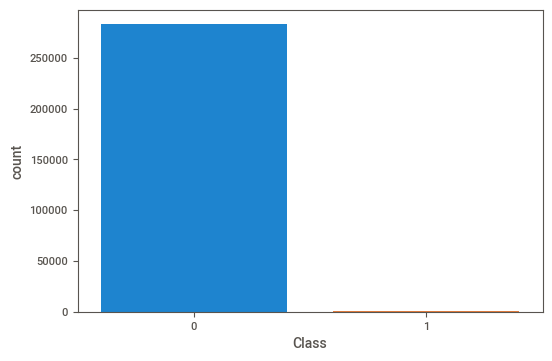

In [ ]:
sns.countplot(y)

#### Much of the "chaos" in the previous notebooks was due to figuring out the order of each step.  

If I cleaned the data from the start, I would have had an issue with the output variable 'Class' which is extremely imbalanced.  As part of the Winsorization process AutoClean would remove the underrepresented 'Class' evaluating them to be outliers.

If I first dealt with the data imbalance then ran AutoClean, the Cleaner would have nullified the effect of oversampling with SMOTE by removing all of the dulplicates it creates.

In the end I decided it was best to simply remove duplicates early on, then perform SMOTE to deal with the balance issue, then run a modified version of AutoClean to handle all outliers.



In [ ]:
# Oversampling with SMOTE
# initialize smote
sm=SMOTE(random_state = 2)
# Split Data
X, y = sm.fit_resample(X, y)

<AxesSubplot:xlabel='Class', ylabel='count'>

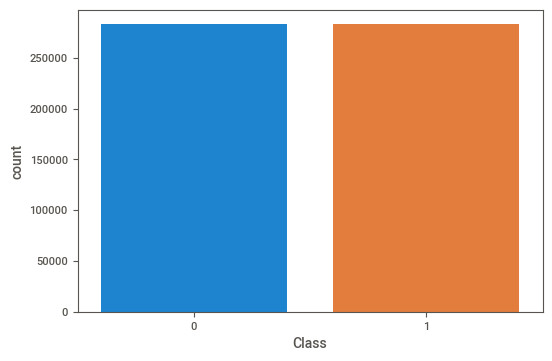

In [ ]:
sns.countplot(y)

In [ ]:
smoted = pd.concat([X,y], axis=1)
smoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566506 entries, 0 to 566505
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V3      566506 non-null  float64
 1   V4      566506 non-null  float64
 2   V7      566506 non-null  float64
 3   V10     566506 non-null  float64
 4   V11     566506 non-null  float64
 5   V12     566506 non-null  float64
 6   V14     566506 non-null  float64
 7   V16     566506 non-null  float64
 8   V17     566506 non-null  float64
 9   Class   566506 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 43.2 MB


In [ ]:
smoted.head()

V3    V4    V7   V10   V11   V12   V14   V16   V17  Class
0 2.54  1.38  0.24  0.09 -0.55 -0.62 -0.31 -0.47  0.21      0
1 0.17  0.45 -0.08 -0.17  1.61  1.07 -0.14  0.46 -0.11      0
2 1.77  0.38  0.79  0.21  0.62  0.07 -0.17 -2.89  1.11      0
3 1.79 -0.86  0.24 -0.05 -0.23  0.18 -0.29 -1.06 -0.68      0
4 1.55  0.40  0.59  0.75 -0.82  0.54 -1.12 -0.45 -0.24      0

<AxesSubplot:xlabel='Class', ylabel='count'>

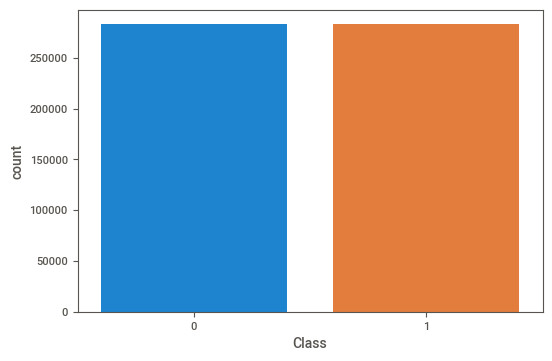

In [ ]:
sns.countplot(smoted.Class)

#### AutoClean takes over 30 minutes to process the entire dataset, so I decided to work with a sample of 50,000 (vs 566,506).  This brought the elapsed time down to 1 minute!

In [ ]:
clean_smote = AutoClean(smoted.sample(n=50000), mode='manual', outliers='auto', verbose=True)

15-03-2023 17:40:39.10 - INFO - Started validation of input parameters...
15-03-2023 17:40:39.10 - INFO - Completed validation of input parameters
15-03-2023 17:40:39.11 - INFO - Skipped handling of duplicates
15-03-2023 17:40:39.11 - INFO - Skipped handling of missing values
15-03-2023 17:40:39.11 - INFO - Started handling of outliers... Method: "AUTO"
15-03-2023 17:40:52.76 - DEBUG - Outlier imputation of 4081 value(s) succeeded for feature "V3"
15-03-2023 17:40:55.64 - DEBUG - Outlier imputation of 863 value(s) succeeded for feature "V4"
15-03-2023 17:41:17.27 - DEBUG - Outlier imputation of 5975 value(s) succeeded for feature "V7"
15-03-2023 17:41:29.96 - DEBUG - Outlier imputation of 4057 value(s) succeeded for feature "V10"
15-03-2023 17:41:34.00 - DEBUG - Outlier imputation of 1105 value(s) succeeded for feature "V11"
15-03-2023 17:41:40.65 - DEBUG - Outlier imputation of 2265 value(s) succeeded for feature "V12"
15-03-2023 17:41:41.98 - DEBUG - Outlier imputation of 380 value(s

Logfile saved to: /content/autoclean.log


In [ ]:
clean_smote=pd.DataFrame(clean_smote.output)

#### Before deciding to work with just a sample of the dataset, I had decided to save a new csv with the cleaned and smoted version of the entire dataset.  But now that it only takes 1 minute to clean, that step can be skipped.

In [ ]:
#from pathlib import Path  
#filepath = Path('/content/drive/MyDrive/Data Science/Data Science Data/Portfolio_Project/clean_smote_50000.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#clean_smote.to_csv(filepath)  

In [ ]:
clean_smote.head()

V3    V4    V7   V10   V11   V12   V14   V16    V17  Class
0 -12.75  6.02 -7.55 -9.16  6.21 -8.79 -9.59 -7.43 -13.17      1
1   0.44  1.58  0.10 -0.22 -1.03 -0.40  0.20  0.94  -0.83      0
2   0.32 -1.03  0.40 -1.03 -0.12  0.67  0.45  0.79  -1.04      0
3  -1.67 -0.17  0.03  0.26  0.04 -0.10  0.86 -1.01  -0.20      1
4  -3.21  4.22 -4.36 -5.41  4.01 -7.19 -8.88 -5.71  -9.81      1

<AxesSubplot:xlabel='Class', ylabel='count'>

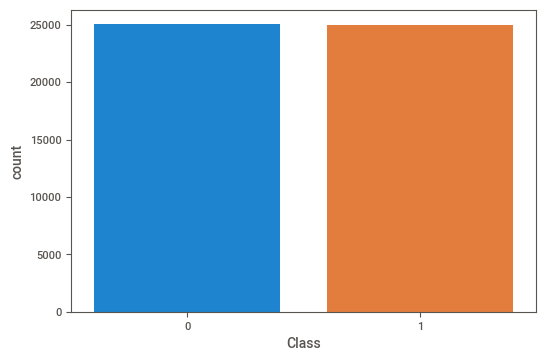

In [ ]:
sns.countplot(clean_smote.Class)

#### It's important to check these two (.head() and countplot/value_counts) because this is where I caught the issues with process step order before.  Now it looks as though everything has processed properly.

I want to try running another version of SweetViz now that I have slimmed down the input features to 9 (from 28).

In [ ]:
comparison_report = sw.compare([X_train, 'train'],[X_test, 'test'])
comparison_report.show_html('output2.html', open_browser=True)

                                             |          | [  0%]   00:00 -> (? left)

Report output2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Interesting Finds:
- there are some features that appear to be correlated with eachother.
- of the 9 features, 4 seem to stand out as most important.
  - originally it looked like there were 3 top features('V12', 'V14', 'V17')
  - now the 4 that stand out are 'V7', 'V12', 'V14', and 'V16' (no longer includes 'V17')

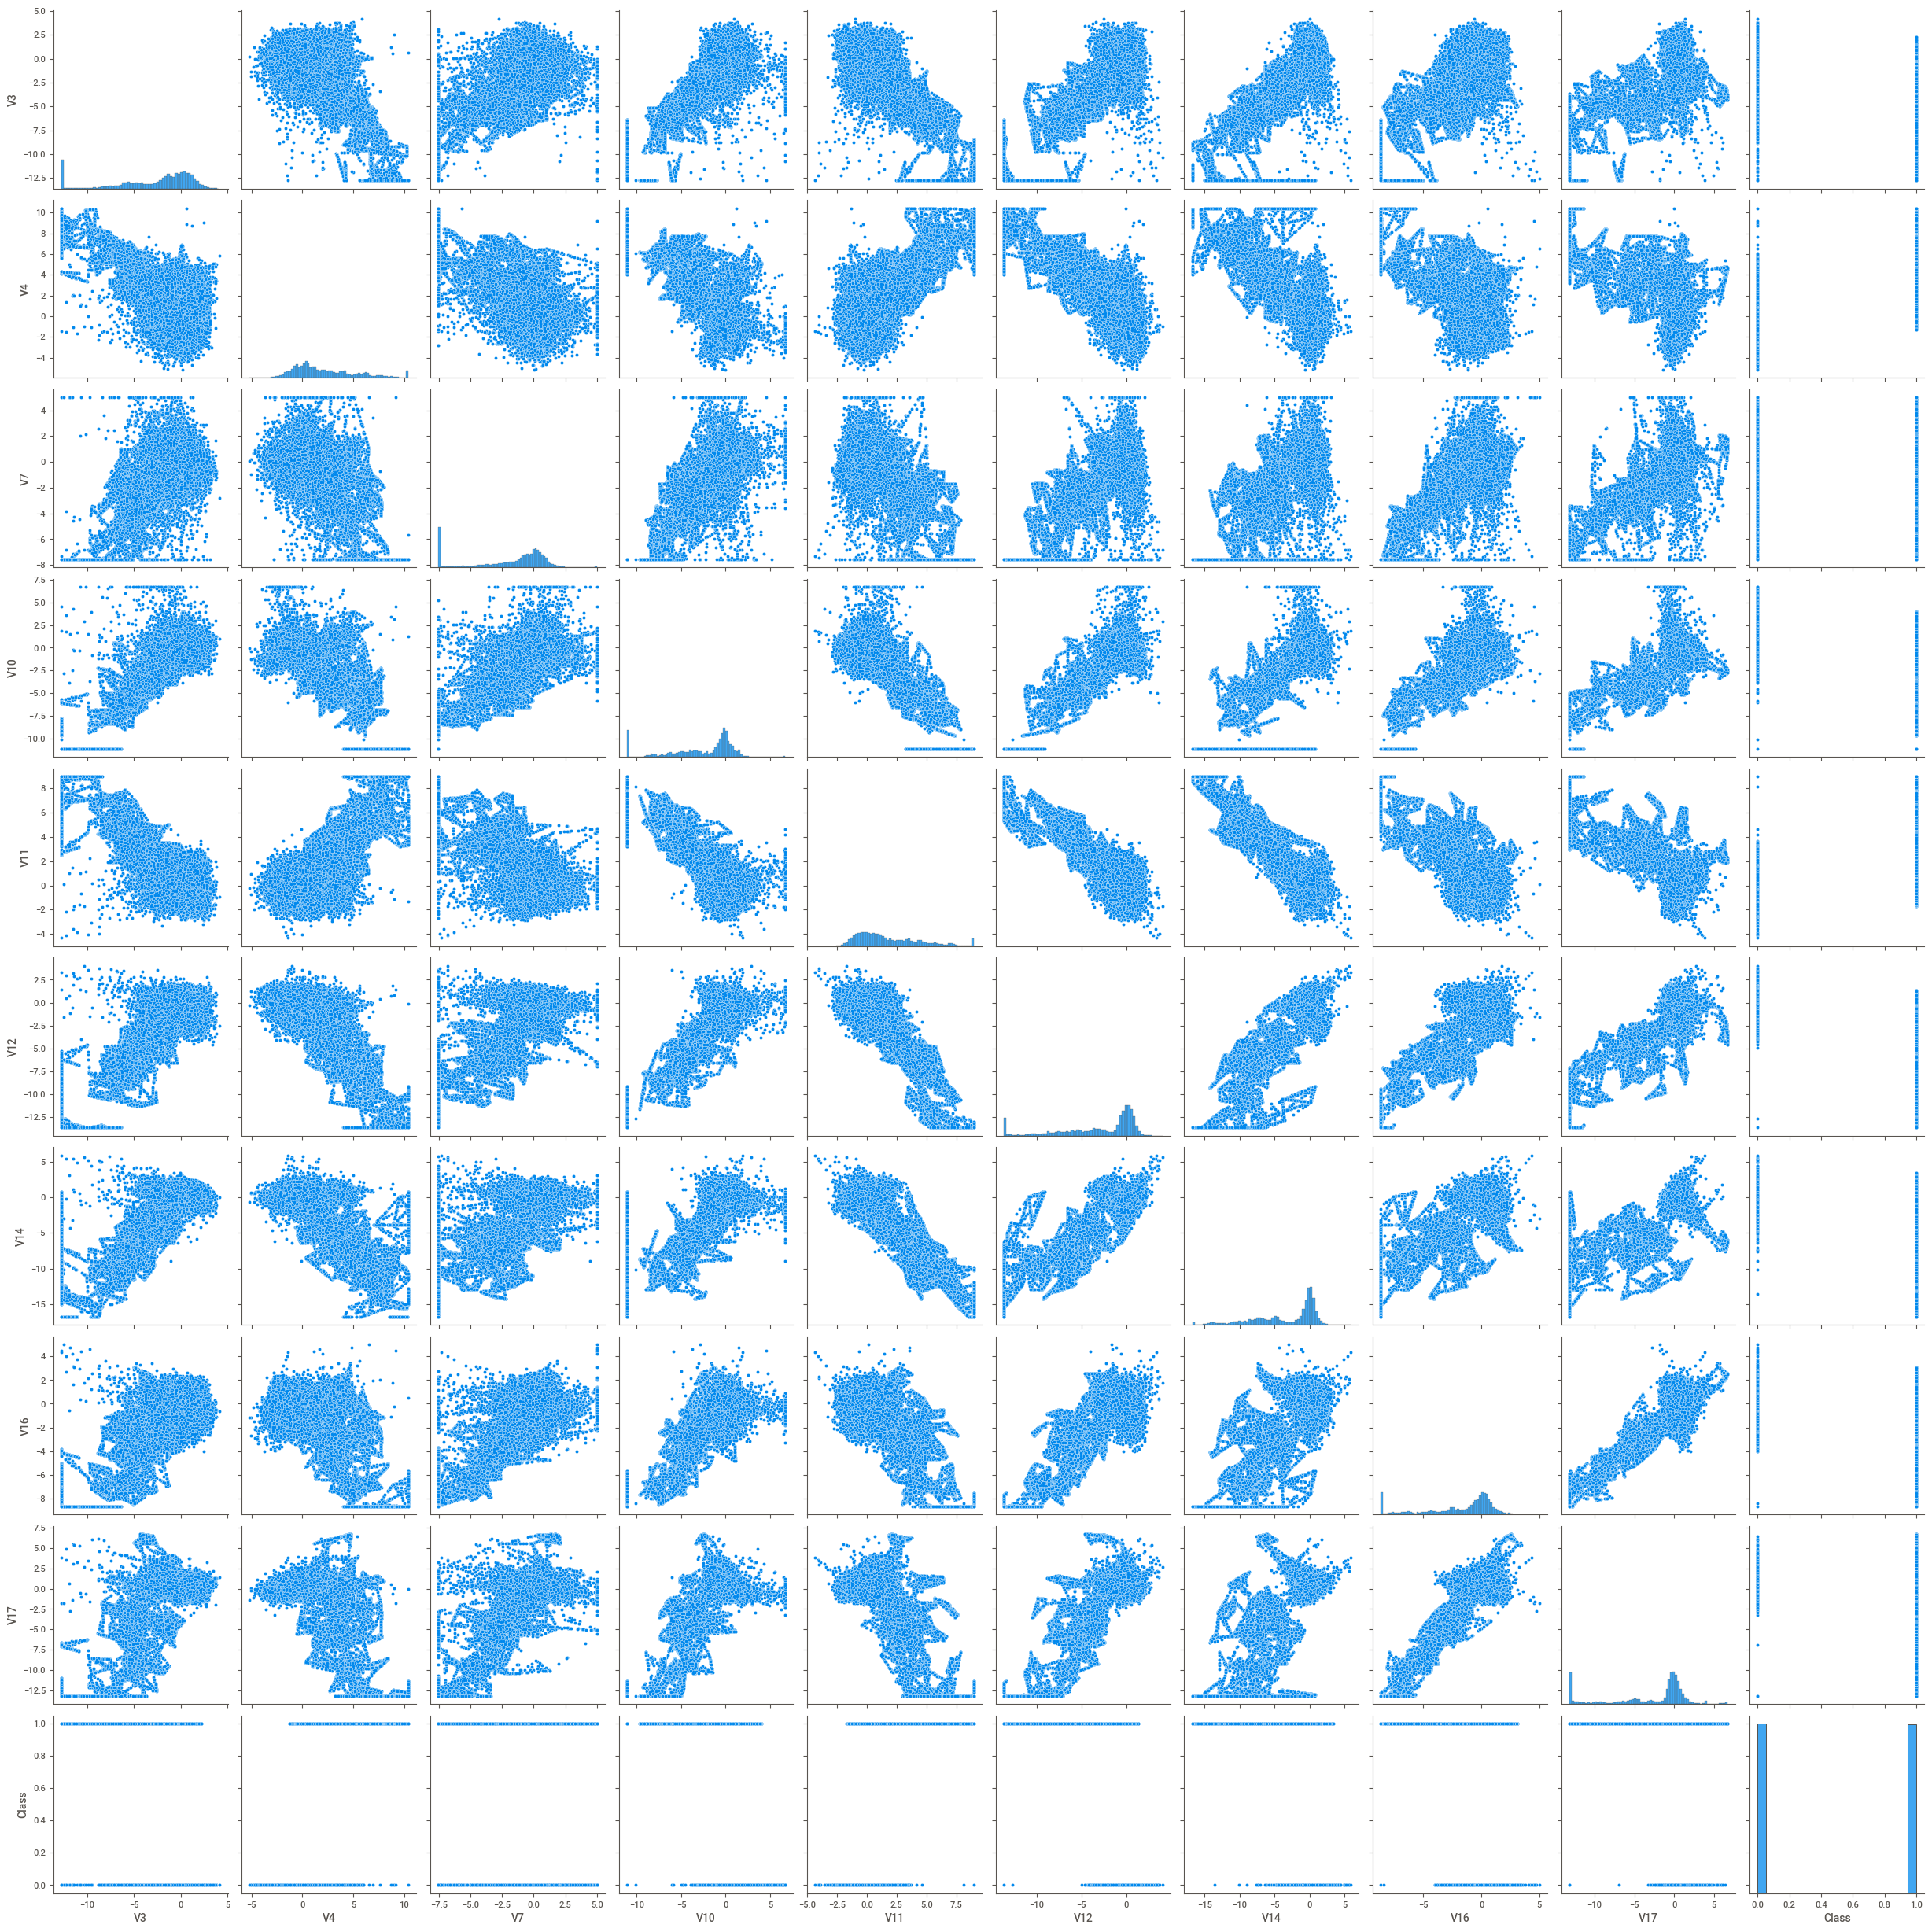

In [ ]:
sns.pairplot(clean_smote)

Target looks like classification
Linear Discriminant Analysis training set score: 0.909


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='count', ylabel='Class'>,
 [<Figure size 1200x600 with 9 Axes>,
  array([[<AxesSubplot:title={'center':'0.931'}, xlabel='V14', ylabel='V4'>,
          <AxesSubplot:title={'center':'0.928'}, xlabel='V14', ylabel='V17'>,
          <AxesSubplot:title={'center':'0.925'}, xlabel='V14', ylabel='V16'>,
          <AxesSubplot:title={'center':'0.925'}, xlabel='V14', ylabel='V12'>]],
        dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 600x400 with 1 Axes>],
 None]

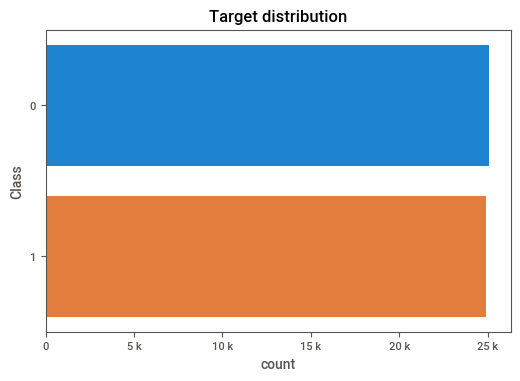

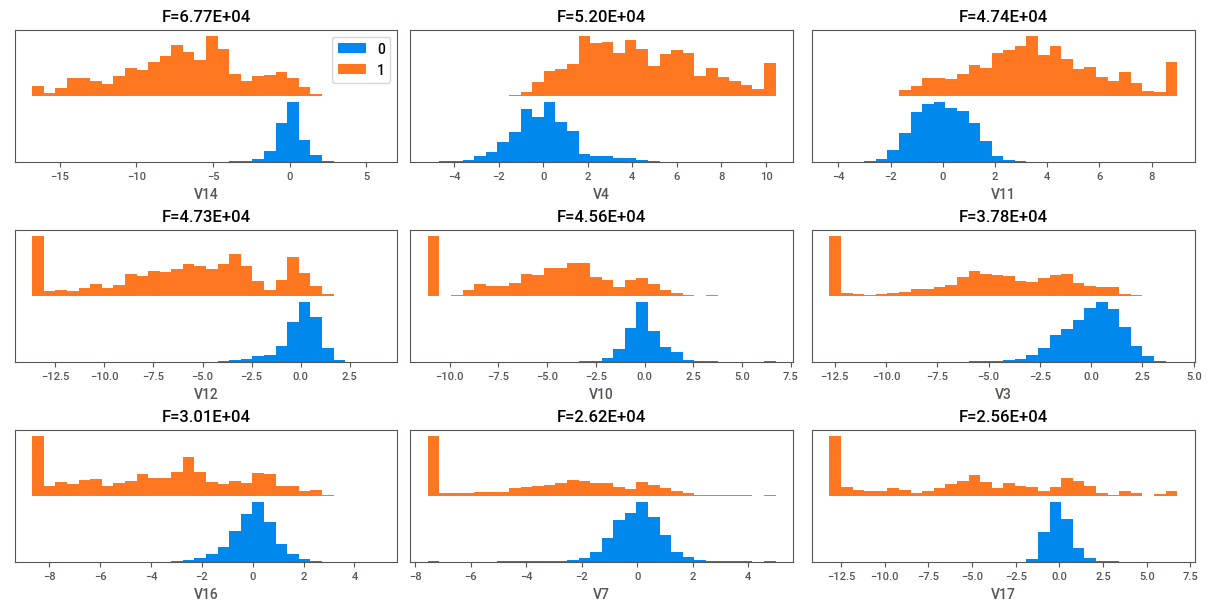

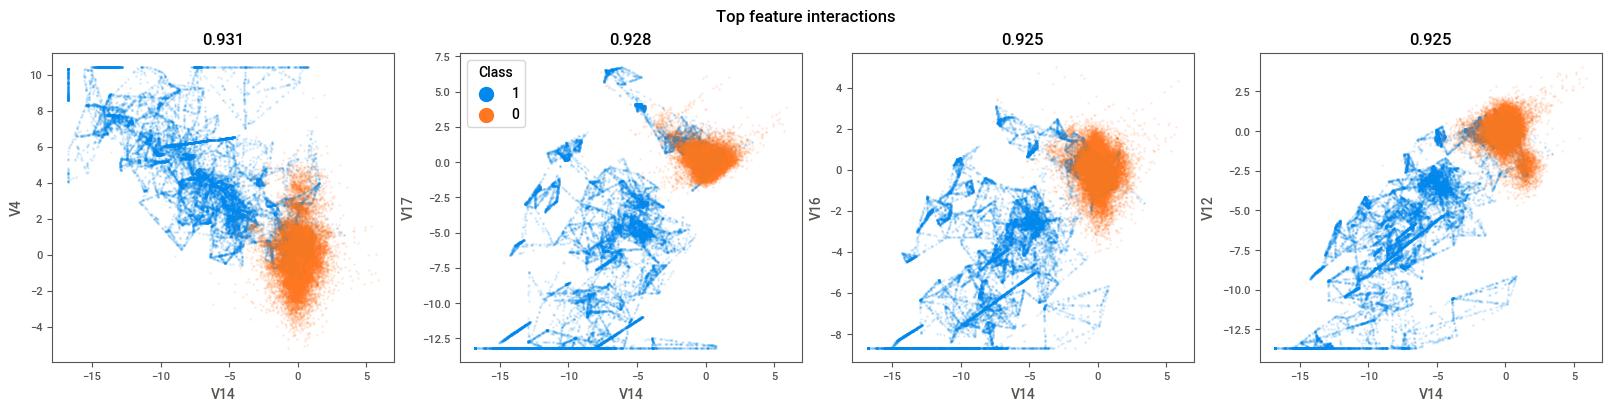

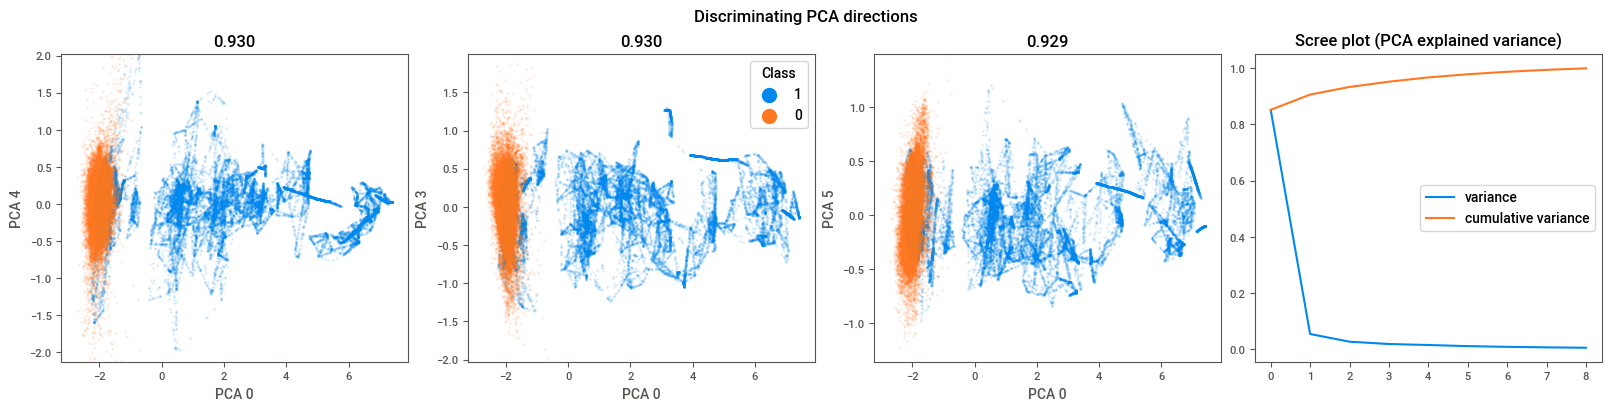

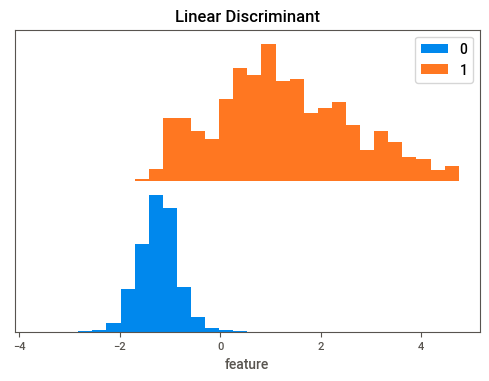

In [105]:
# Visualizing Feature relationships using Dabl
dabl.plot(clean_smote, target_col= 'Class')

Target looks like regression


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='V7', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=6.90E-01'}, xlabel='V16', ylabel='V7'>,
         <AxesSubplot:title={'center':'F=6.89E-01'}, xlabel='V12'>,
         <AxesSubplot:title={'center':'F=-6.84E-01'}, xlabel='V11'>,
         <AxesSubplot:title={'center':'F=6.74E-01'}, xlabel='V17'>],
        [<AxesSubplot:title={'center':'F=6.60E-01'}, xlabel='V14', ylabel='V7'>,
         <AxesSubplot:title={'center':'F=6.51E-01'}, xlabel='V10'>,
         <AxesSubplot:title={'center':'F=6.43E-01'}, xlabel='V3'>,
         <AxesSubplot:title={'center':'F=-6.08E-01'}, xlabel='V4'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=2.90E-01'}, xlabel='V7', ylabel='Class'>]],
       dtype=object)]

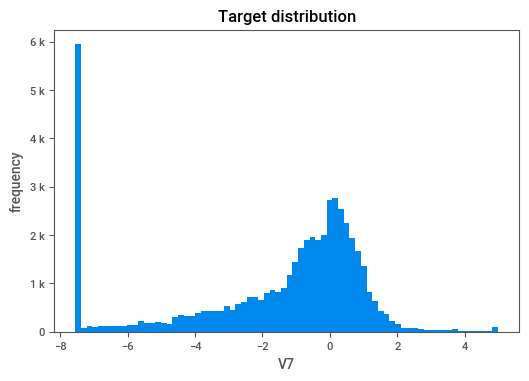

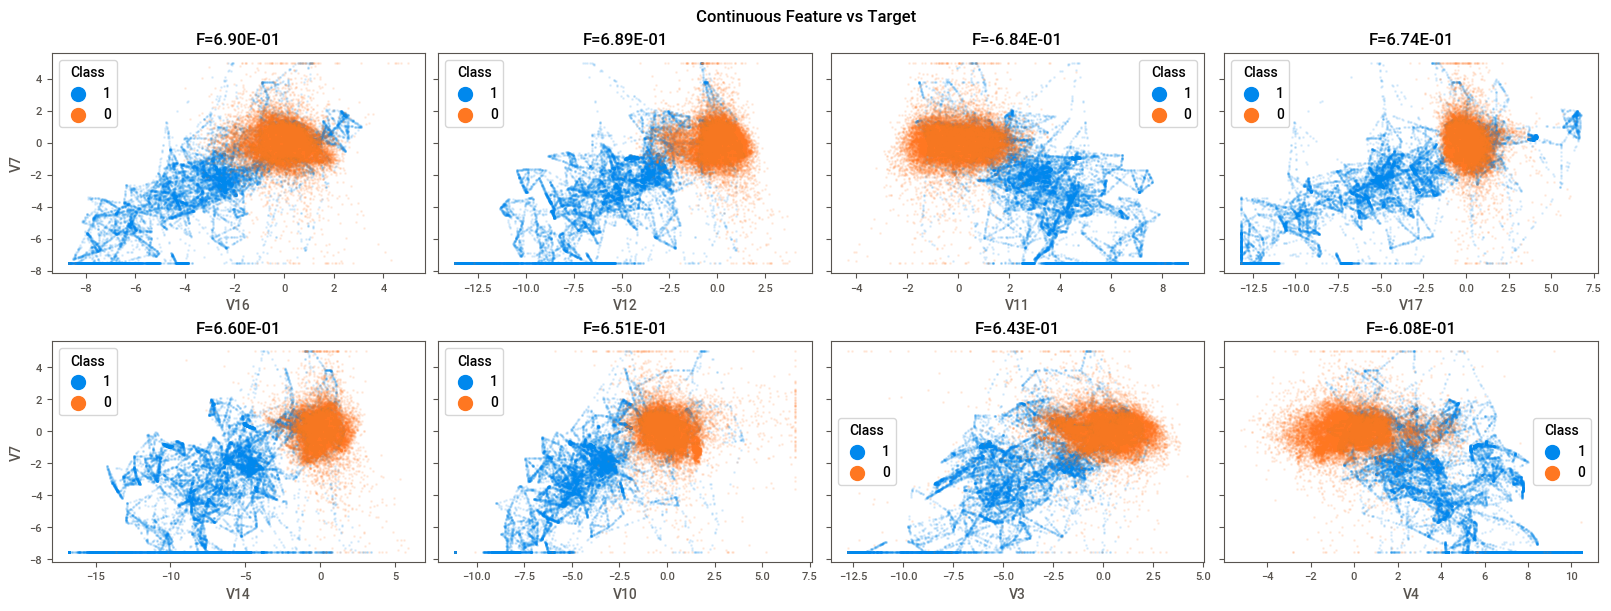

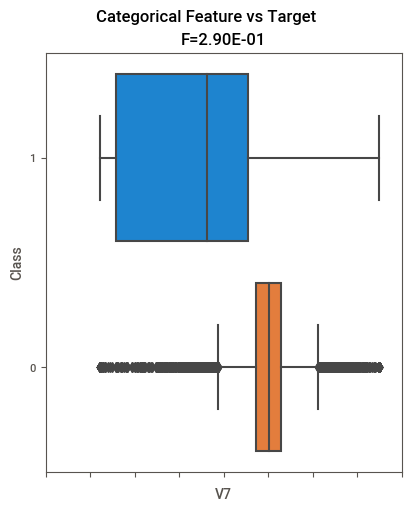

In [ ]:
# Looking at the top 4 features using Dabl
dabl.plot(clean_smote, target_col= 'V7')


Target looks like regression


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='V12', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=7.57E-01'}, xlabel='V14', ylabel='V12'>,
         <AxesSubplot:title={'center':'F=-7.38E-01'}, xlabel='V11'>,
         <AxesSubplot:title={'center':'F=7.36E-01'}, xlabel='V10'>,
         <AxesSubplot:title={'center':'F=7.33E-01'}, xlabel='V3'>],
        [<AxesSubplot:title={'center':'F=-7.22E-01'}, xlabel='V4', ylabel='V12'>,
         <AxesSubplot:title={'center':'F=6.89E-01'}, xlabel='V7'>,
         <AxesSubplot:title={'center':'F=6.86E-01'}, xlabel='V16'>,
         <AxesSubplot:title={'center':'F=6.38E-01'}, xlabel='V17'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=4.15E-01'}, xlabel='V12', ylabel='Class'>]],
       dtype=object)]

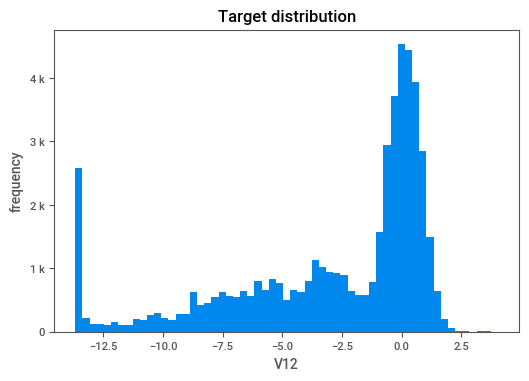

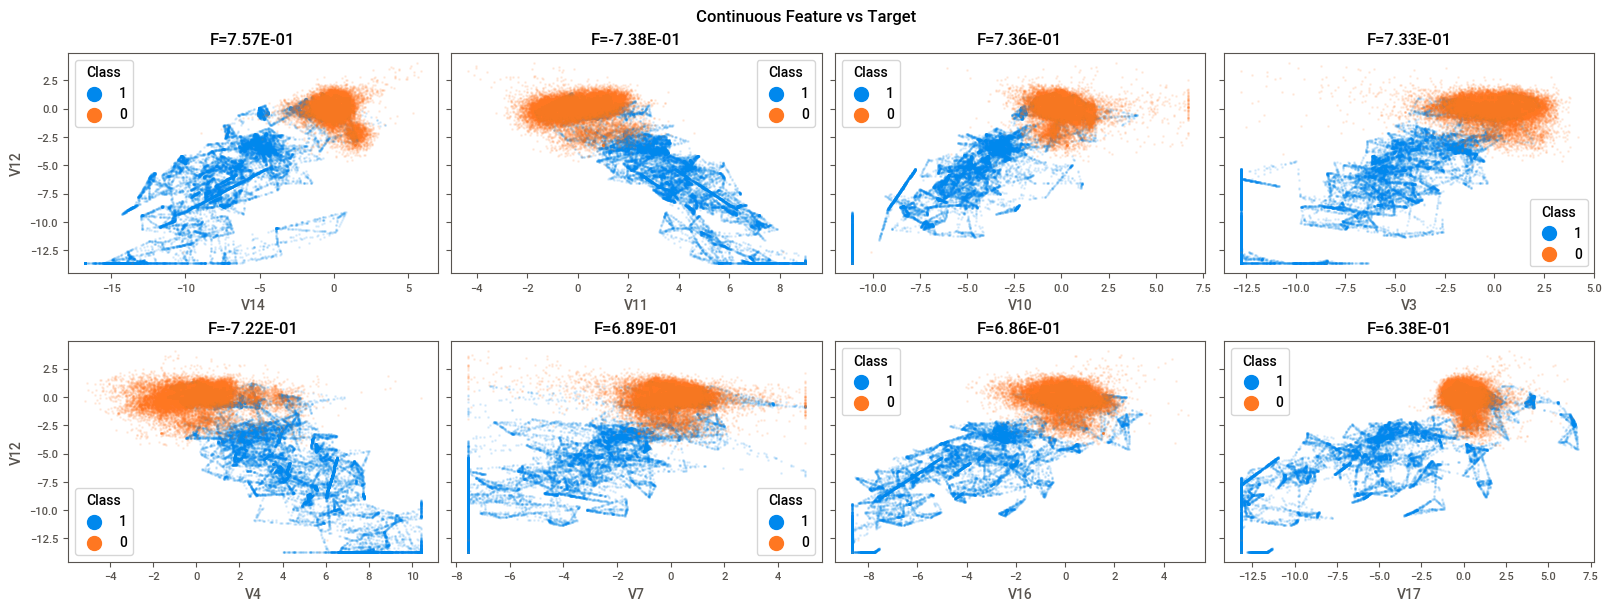

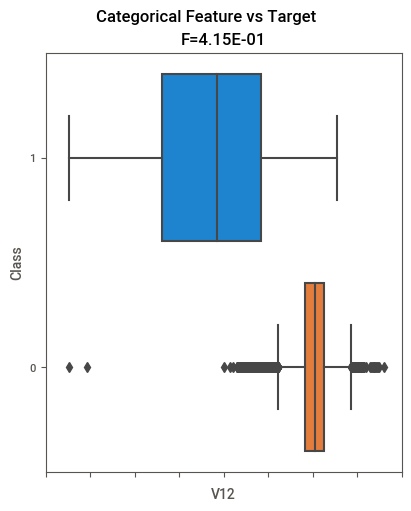

In [ ]:
dabl.plot(clean_smote, target_col= 'V12')

Target looks like regression


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='V14', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=7.75E-01'}, xlabel='V10', ylabel='V14'>,
         <AxesSubplot:title={'center':'F=7.57E-01'}, xlabel='V12'>,
         <AxesSubplot:title={'center':'F=-7.52E-01'}, xlabel='V11'>,
         <AxesSubplot:title={'center':'F=7.25E-01'}, xlabel='V3'>],
        [<AxesSubplot:title={'center':'F=-7.20E-01'}, xlabel='V4', ylabel='V14'>,
         <AxesSubplot:title={'center':'F=6.60E-01'}, xlabel='V7'>,
         <AxesSubplot:title={'center':'F=6.13E-01'}, xlabel='V16'>,
         <AxesSubplot:title={'center':'F=5.58E-01'}, xlabel='V17'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=4.85E-01'}, xlabel='V14', ylabel='Class'>]],
       dtype=object)]

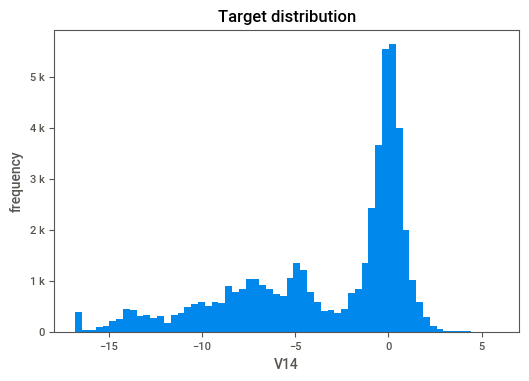

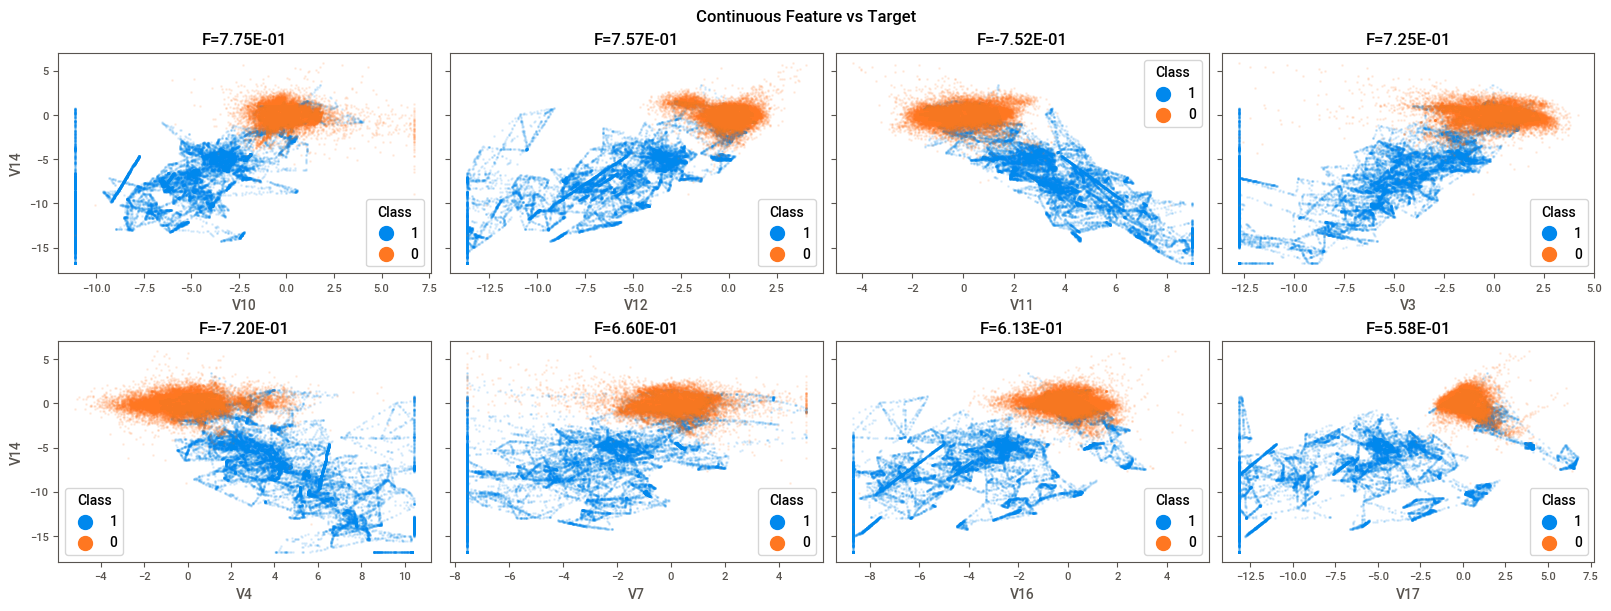

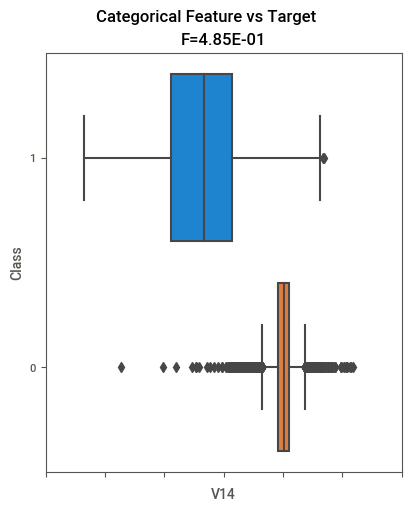

In [ ]:
dabl.plot(clean_smote, target_col= 'V14')

Target looks like regression


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='V16', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=7.35E-01'}, xlabel='V17', ylabel='V16'>,
         <AxesSubplot:title={'center':'F=6.96E-01'}, xlabel='V10'>,
         <AxesSubplot:title={'center':'F=6.90E-01'}, xlabel='V7'>,
         <AxesSubplot:title={'center':'F=6.86E-01'}, xlabel='V12'>],
        [<AxesSubplot:title={'center':'F=-6.61E-01'}, xlabel='V11', ylabel='V16'>,
         <AxesSubplot:title={'center':'F=6.49E-01'}, xlabel='V3'>,
         <AxesSubplot:title={'center':'F=6.13E-01'}, xlabel='V14'>,
         <AxesSubplot:title={'center':'F=-5.97E-01'}, xlabel='V4'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=3.38E-01'}, xlabel='V16', ylabel='Class'>]],
       dtype=object)]

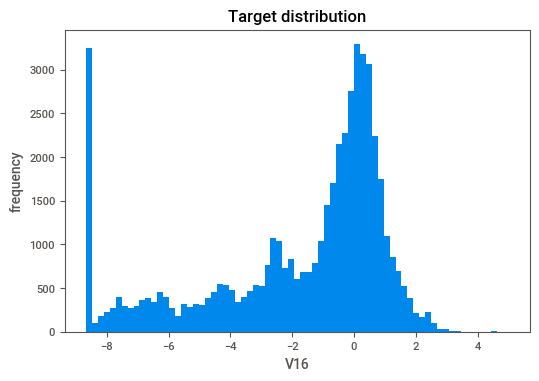

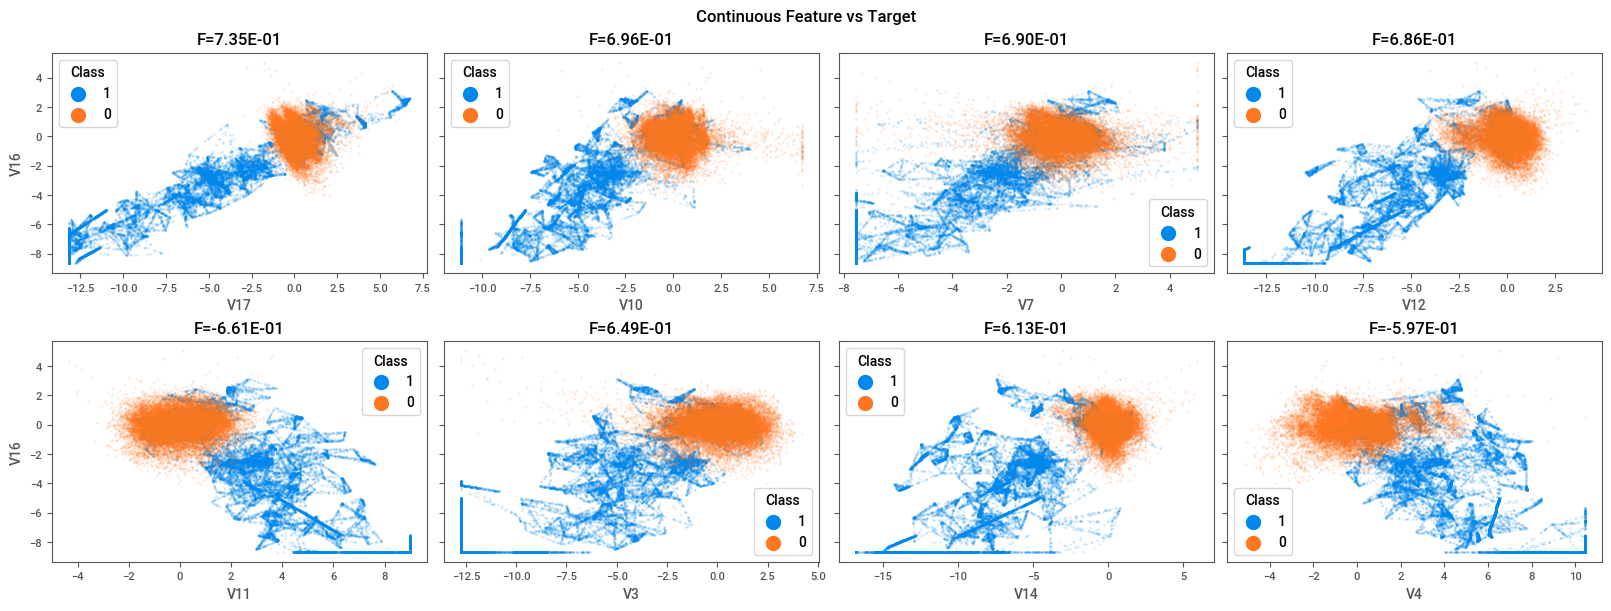

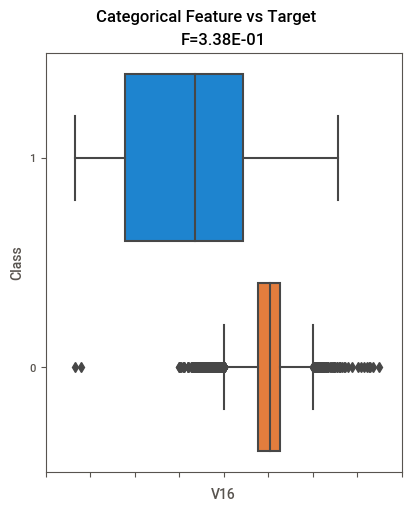

In [ ]:
dabl.plot(clean_smote, target_col= 'V16')

#### I've added a few more visuals before model building.  A quick look at the Dabl visuals gives optimism that an effective model can be built!
(SNS pairplot is less effective with so many features)

## Logistic Regression Model

In [108]:
# X/y Split 
X = clean_smote.loc[:, clean_smote.columns != 'Class']
y = clean_smote['Class'].astype('float')
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(f'Test Shape (X, y): {X_test.shape}, {y_test.shape}\nTrain shape (X, y): {X_train.shape}, {y_train.shape}')

Test Shape (X, y): (15000, 9), (15000,)
Train shape (X, y): (35000, 9), (35000,)


In [ ]:
# Train

lr1 = LogisticRegression()
lr1.fit(X_train, y_train)
predictions = lr1.predict(X_train)
  
# print classification report
print(classification_report(y_train, predictions))
LR_Train_Accuracy = accuracy_score(y_train, predictions)
LR_Train_Accuracy

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94     17553
         1.0       0.97      0.90      0.93     17447

    accuracy                           0.94     35000
   macro avg       0.94      0.94      0.94     35000
weighted avg       0.94      0.94      0.94     35000



0.9352857142857143

In [ ]:
# Test 
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
LR_Test_Accuracy = accuracy_score(y_test, predictions)
LR_Test_Accuracy

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      7504
         1.0       0.98      0.90      0.93      7496

    accuracy                           0.94     15000
   macro avg       0.94      0.94      0.94     15000
weighted avg       0.94      0.94      0.94     15000



0.9366666666666666

## Using 3 different Classifiers 
(AdaBoost, XGB, and ExtraTrees)

In [ ]:
# initializing all the model objects with default parameters
model_1 = AdaBoostClassifier()
model_2 = XGBClassifier()
model_3 = ExtraTreesClassifier()

In [ ]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

ExtraTreesClassifier()

In [109]:
# Train
pred_1 = model_1.predict(X_train)
pred_2 = model_2.predict(X_train)
pred_3 = model_3.predict(X_train)

MSE_1= mean_squared_error(y_train, pred_1)
MSE_2= mean_squared_error(y_train, pred_2)
MSE_3= mean_squared_error(y_train, pred_3)

AB_Train_Accuracy=(1-mean_squared_error(y_train, pred_1))*100
XG_Train_Accuracy=(1-mean_squared_error(y_train, pred_2))*100
ET_Train_Accuracy=(1-mean_squared_error(y_train, pred_3))*100

print(f'For AdaBoost: MSE= {MSE_1}\nAccuracy(%)= {AB_Train_Accuracy}\nFor XGB: MSE= {MSE_2}\nAccuracy(%)= {XG_Train_Accuracy}\nFor ExtraTrees: MSE= {MSE_3}\nAccuracy(%)= {ET_Train_Accuracy}')

For AdaBoost: MSE= 0.054
Accuracy(%)= 94.6
For XGB: MSE= 0.00017142857142857143
Accuracy(%)= 99.98285714285714
For ExtraTrees: MSE= 0.0
Accuracy(%)= 100.0


In [111]:
# Test

pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)

MSE_1= mean_squared_error(y_test, pred_1)
MSE_2= mean_squared_error(y_test, pred_2)
MSE_3= mean_squared_error(y_test, pred_3)

AB_Test_Accuracy=(1-mean_squared_error(y_test, pred_1))*100
XG_Test_Accuracy=(1-mean_squared_error(y_test, pred_2))*100
ET_Test_Accuracy=(1-mean_squared_error(y_test, pred_3))*100

print(f'For AdaBoost: MSE= {MSE_1}\nAccuracy(%)= {AB_Test_Accuracy}\nFor XGB: MSE= {MSE_2}\nAccuracy(%)= {XG_Test_Accuracy}\nFor ExtraTrees: MSE= {MSE_3}\nAccuracy(%)= {accuracy_3}')

For AdaBoost: MSE= 0.0526
Accuracy(%)= 94.74000000000001
For XGB: MSE= 0.0054
Accuracy(%)= 99.46000000000001
For ExtraTrees: MSE= 0.003
Accuracy(%)= 99.7


## ANN


In [ ]:
X_train.shape

(35000, 9)

In [ ]:
def design_mlp():
    model = Sequential()
    model.add(Dense(150,input_shape =(None,35000, 9),activation="relu"))
    model.add(Dense(200,activation="tanh"))
    model.add(Dense(100,activation="tanh"))
    model.add(Dense(1000,activation="tanh"))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

In [ ]:
model = design_mlp()
model.fit(X_train, y_train,epochs=5, batch_size=5)

Epoch 1/5


7000/7000 [==============================] - 36s 5ms/step - loss: 0.1135 - accuracy: 0.9564
Epoch 2/5
7000/7000 [==============================] - 34s 5ms/step - loss: 0.0674 - accuracy: 0.9751
Epoch 3/5
7000/7000 [==============================] - 34s 5ms/step - loss: 0.0567 - accuracy: 0.9803
Epoch 4/5
7000/7000 [==============================] - 35s 5ms/step - loss: 0.0495 - accuracy: 0.9829
Epoch 5/5
7000/7000 [==============================] - 34s 5ms/step - loss: 0.0443 - accuracy: 0.9849


In [ ]:
A1_Train_Accuracy = 0.9849

In [ ]:
model = design_mlp()
model.fit(X_test, y_test,epochs=5, batch_size=5)

Epoch 1/5


3000/3000 [==============================] - 16s 5ms/step - loss: 0.1332 - accuracy: 0.9529
Epoch 2/5
3000/3000 [==============================] - 23s 8ms/step - loss: 0.0933 - accuracy: 0.9661
Epoch 3/5
3000/3000 [==============================] - 29s 10ms/step - loss: 0.0741 - accuracy: 0.9739
Epoch 4/5
3000/3000 [==============================] - 29s 10ms/step - loss: 0.0658 - accuracy: 0.9783
Epoch 5/5
3000/3000 [==============================] - 31s 10ms/step - loss: 0.0584 - accuracy: 0.9793


In [ ]:
A1_Test_Accuracy = 0.9793

## REsults so far

- Logistic Regression the accuracy was 94%
- AdaBoost it was ~94.7%
- XGBoost it was ~99.6%
- ExtraTrees it was ~99.7
- ANN it was ~98.5%, 


These are all quite good, but I will run a function to determine optimal hypertuning for the ANN parameters as well as LazyClassifier to see if there are other models that can out perform Logistic Regression.

In [ ]:
# Defining a function for finding best hyperparameters
def FunctionFindBestParams(X_train, y_train):
    
    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 15, 20]
    epoch_list=[5, 10, 25 ,50]
    
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            
            # Creating the classifier ANN model
            model = Sequential()
            model.add(Dense(150,input_shape =(None,35000, 9),activation="relu"))
            model.add(Dense(200,activation="tanh"))
            model.add(Dense(100,activation="tanh"))
            model.add(Dense(1000,activation="tanh"))
            model.add(Dense(1,activation="sigmoid"))
            model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
            
            hyper_model=model.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            # Fetching the accuracy of the training
            Accuracy = hyper_model.history['accuracy'][-1]
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

###############################################

# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train)

In [ ]:
# Re-run with optimal parameters
top_model = design_mlp()
top_model.fit(X_train, y_train,epochs=7, batch_size=15)

Epoch 1/7


2334/2334 [==============================] - 23s 9ms/step - loss: 0.1123 - accuracy: 0.9555
Epoch 2/7
2334/2334 [==============================] - 13s 6ms/step - loss: 0.0656 - accuracy: 0.9755
Epoch 3/7
2334/2334 [==============================] - 14s 6ms/step - loss: 0.0463 - accuracy: 0.9838
Epoch 4/7
2334/2334 [==============================] - 14s 6ms/step - loss: 0.0393 - accuracy: 0.9859
Epoch 5/7
2334/2334 [==============================] - 18s 8ms/step - loss: 0.0357 - accuracy: 0.9879
Epoch 6/7
2334/2334 [==============================] - 18s 8ms/step - loss: 0.0321 - accuracy: 0.9887
Epoch 7/7
2334/2334 [==============================] - 20s 9ms/step - loss: 0.0295 - accuracy: 0.9901


In [ ]:
A2_Train_Accuracy = 0.9901

In [ ]:
top_model = design_mlp()
top_model.fit(X_test, y_test,epochs=5, batch_size=5)

Epoch 1/5


3000/3000 [==============================] - 15s 5ms/step - loss: 0.1339 - accuracy: 0.9509
Epoch 2/5
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0925 - accuracy: 0.9665
Epoch 3/5
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0732 - accuracy: 0.9736
Epoch 4/5
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0626 - accuracy: 0.9779
Epoch 5/5
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0575 - accuracy: 0.9791


In [ ]:
A2_Test_Accuracy = 0.9791

#### Running the function above using higher parameters (i.e. batch_size=100) caused it to crash, so I set the max to 50.
However, I've already run this in Notebook 2 and know which parameters are best, so I will save the time here and skip it. :)
With only **7 epochs accuracy is over 99%**, it incrementaly improves with each epoch, but I don't think it's worth running. 


Similarly, some of the Classifiers used in LazyClassifier take quite a while to run, so I used a sample of 25000.

In [ ]:
df_samp= clean_smote.sample(25000)
# X/y Split 
X = df_samp.loc[:, df_samp.columns != 'Class']
y = df_samp['Class']
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(f'Test Shape (X, y): {X_test.shape}, {y_test.shape}\nTrain shape (X, y): {X_train.shape}, {y_train.shape}')
# fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

Test Shape (X, y): (7500, 9), (7500,)
Train shape (X, y): (17500, 9), (17500,)


100%|██████████| 29/29 [01:24<00:00,  2.92s/it]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.99               0.99     0.99      0.99   
XGBClassifier                      0.99               0.99     0.99      0.99   
LGBMClassifier                     0.99               0.99     0.99      0.99   
RandomForestClassifier             0.99               0.99     0.99      0.99   
KNeighborsClassifier               0.98               0.98     0.98      0.98   
BaggingClassifier                  0.98               0.98     0.98      0.98   
DecisionTreeClassifier             0.97               0.97     0.97      0.97   
ExtraTreeClassifier                0.97               0.97     0.97      0.97   
AdaBoostClassifier                 0.95               0.95     0.95      0.95   
SVC                                0.94               0.94     0.94      0.94   
CalibratedClassifierCV             0.93               0.93     0.93      0.93   
LogisticRegression                 0.93               0.93     0.93      0.93   
LinearSVC                          0.93               0.93     0.93      0.93   
Perceptron                         0.93               0.93     0.93      0.93   
SGDClassifier                      0.93               0.93     0.93      0.93   
QuadraticDiscriminantAnalysis      0.93               0.93     0.93      0.93   
GaussianNB                         0.91               0.91     0.91      0.91   
NuSVC                              0.91               0.91     0.91      0.90   
LinearDiscriminantAnalysis         0.90               0.91     0.91      0.90   
RidgeClassifier                    0.90               0.91     0.91      0.90   
RidgeClassifierCV                  0.90               0.91     0.91      0.90   
BernoulliNB                        0.90               0.91     0.91      0.90   
PassiveAggressiveClassifier        0.91               0.90     0.90      0.91   
NearestCentroid                    0.89               0.89     0.89      0.88   
DummyClassifier                    0.49               0.50     0.50      0.33   

                               Time Taken  
Model                                      
ExtraTreesClassifier                 2.67  
XGBClassifier                        6.20  
LGBMClassifier                       0.42  
RandomForestClassifier               4.82  
KNeighborsClassifier                 0.89  
BaggingClassifier                    4.35  
DecisionTreeClassifier               0.40  
ExtraTreeClassifier                  0.08  
AdaBoostClassifier                   2.86  
SVC                                  3.36  
CalibratedClassifierCV               5.80  
LogisticRegression                   0.13  
LinearSVC                            0.65  
Perceptron                           0.08  
SGDClassifier                        0.13  
QuadraticDiscriminantAnalysis        0.11  
GaussianNB                           0.08  
NuSVC                               23.73  
LinearDiscriminantAnalysis           0.14  
RidgeClassifier                      0.07  
RidgeClassifierCV                    0.08  
BernoulliNB                          0.19  
PassiveAggressiveClassifier          0.08  
NearestCentroid                      0.09  
DummyClassifier                      0.12

# Summary Comparison 

In [112]:
Report = pd.DataFrame( [{'LogReg': LR_Train_Accuracy, 'ExtraTrees': ET_Train_Accuracy, 'XGB': XG_Train_Accuracy,'AdaBoost': AB_Train_Accuracy,'ANN1': A1_Train_Accuracy, 'ANN2': A2_Train_Accuracy},
        {'LogReg': LR_Test_Accuracy, 'ExtraTrees': ET_Test_Accuracy, 'XGB': XG_Test_Accuracy, 'AdaBoost': AB_Test_Accuracy, 'ANN1': A1_Test_Accuracy, 'ANN2': A2_Test_Accuracy},
       ],index=['Train_Accuracy',
                               'Test_Accuracy'])
Report

LogReg  ExtraTrees   XGB  AdaBoost  ANN1  ANN2
Train_Accuracy    0.94      100.00 99.98     94.60  0.98  0.99
Test_Accuracy     0.94       99.70 99.46     94.74  0.98  0.98

In [113]:
report = Report.T
report

Train_Accuracy  Test_Accuracy
LogReg                0.94           0.94
ExtraTrees          100.00          99.70
XGB                  99.98          99.46
AdaBoost             94.60          94.74
ANN1                  0.98           0.98
ANN2                  0.99           0.98

In [114]:
report['Overall_Accuracy'] = (report['Train_Accuracy']+report['Test_Accuracy'])/2

In [115]:
report

Train_Accuracy  Test_Accuracy  Overall_Accuracy
LogReg                0.94           0.94              0.94
ExtraTrees          100.00          99.70             99.85
XGB                  99.98          99.46             99.72
AdaBoost             94.60          94.74             94.67
ANN1                  0.98           0.98              0.98
ANN2                  0.99           0.98              0.98

#### Here I have created a table with the models listed in the order I created/ran them.  Some of the train and test scores were rounded by default.

Things I would add:
- other accuracy metrics (including time to run)
- change the float format so that the difference between accuracy scores could be better displayed
- add visuals comparing models